## Supervised Machine Learning
### Nearest Neighbor Regression, Decision Trees and Random Forests

The work in this notebook utilizes materials introduced in **Phys 247**, taught by Prof. D. Kirkby.

In this notebook, we will discuss some of the elementary algorithms available for a supervised learning problem. But before explorings these algorithms, let us import the libraries that we will be using. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The regression algorothims can be implimented using specific peckages from scikit-learn.

In [2]:
from sklearn import model_selection, neighbors, tree, ensemble

#### Importing Data

The data used here, has been collected from "https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data" in UCI Machine Learning Repository and is tailored for regression task.
The data set had 81 features for 21263 superconductors. For convinience, only 5000 superconductors are considered here. 

In [3]:
def load_data():
    sc_data=pd.read_csv("train.csv")
    return sc_data.iloc[0:5000] #change to increase or decrease data set size

In [4]:
df = load_data()
N, D = df.shape

For convenience, we will further reduce the number of features to 30. The last column, the critical temperature has been considered as the label(value to be predicted)

In [5]:
X = df.iloc[:, :30] #features
Y = df.iloc[:, -1]  #label

In [6]:
X.describe() #The selected features and the properties of the data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.027400,85.215996,61.735312,64.357706,42.739795,1.386456,1.336510,146.688969,23.946253,53.174057,...,322.016564,161.432837,122.388962,140.843430,101.043759,1.494114,1.407784,192.814200,36.817395,68.037110
std,0.869943,14.421504,16.205354,10.412137,14.953024,0.182814,0.199781,33.627590,11.485461,12.310531,...,46.249699,11.320043,22.748854,10.063538,25.420305,0.195505,0.180166,17.103525,15.799566,8.654762
min,2.000000,16.335723,12.219975,15.696865,12.167268,0.240242,0.040647,10.979069,1.565455,4.775162,...,84.884560,104.333333,68.806452,86.890698,65.136467,0.476751,0.053335,128.000000,3.400000,49.557223
25%,4.000000,76.444563,51.388303,59.356672,34.942820,1.199541,1.261016,121.327600,14.715694,43.823354,...,330.927160,152.666667,108.551606,136.126003,87.120521,1.275274,1.335218,171.000000,24.191094,60.675366
50%,5.000000,84.567319,56.502908,64.570275,36.021417,1.429242,1.340132,128.242600,20.825477,51.930223,...,341.896911,162.000000,114.538462,140.945228,89.705371,1.505283,1.396337,205.000000,35.698297,69.424491
75%,6.000000,93.530600,68.826001,70.358975,39.709770,1.504344,1.453073,188.383900,31.920690,63.695003,...,345.964830,168.000000,117.503363,146.121197,92.873770,1.672203,1.542210,205.000000,45.800000,75.237540
max,8.000000,142.376700,152.464120,98.761740,137.387467,1.898379,1.958203,202.039400,137.643230,81.794265,...,477.813164,210.000000,243.160000,178.062569,237.911356,2.014673,1.903748,250.000000,240.164344,115.500000


In [7]:
Y.describe()

count    5000.000000
mean       62.068880
std        30.620157
min         0.001000
25%        34.375000
50%        67.040000
75%        87.100000
max       143.000000
Name: critical_temp, dtype: float64

Now we will split the data set into test and training set. I will use a 3:1 division for training and test set. 

In [8]:
gen = np.random.RandomState(seed=123)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=gen)

#### K-Nearest Neighbor Regression

In [9]:
knn_fit = neighbors.KNeighborsRegressor(n_neighbors=5,n_jobs=3).fit(X_train, Y_train)
#n_neighbors= hyperparameter, No. of neighbors to consider, default=5.
#n_jobs = hyperparameter, No. of parallel jobs to run for neighor search,

In [10]:
#score on training set and test set to evaluate goodness of fit
knn_fit.score(X_train, Y_train), knn_fit.score(X_test, Y_test)

(0.8323140796091031, 0.699636672649973)

Hyperparameter optimization-

In [11]:
def k_neighbor(n=(2,3,4,5,6,8,10), max_score_samples=2000):
    # The n values can be changed based on the dataset
    train_score, test_score = [], []
    for n_neighbors in n:
        fit = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, n_jobs=4).fit(X_train, Y_train)
        train_score.append(fit.score(X_train[:max_score_samples], Y_train[:max_score_samples]))
        test_score.append(fit.score(X_test[:max_score_samples], Y_test[:max_score_samples]))
    plt.plot(n, train_score, 'rx-', label='TRAIN')
    plt.plot(n, test_score, 'bo-', label='TEST')
    plt.xlabel('KNN n_neighbors')
    plt.ylabel('KNN $R^2$ score')
    plt.legend()

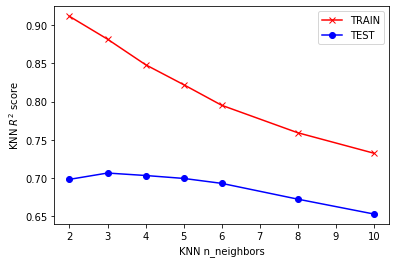

In [12]:
k_neighbor()

We noticed that $R^2$ value keeps decreasing with increasing n_neighbors. Looking at the test set, we can say that n_neighbors = 3 will be a good value for this data-set.

#### Decission Tree Regression

We can use a binary decision tree to sort each input sample into a small "peer group" with DecisionTreeRegressor. The process is similar to KNN, except now we ask a set of questions to identify the "peer group", instead of using nearest neighbors.

In [13]:
gen = np.random.RandomState(seed=123)
tree_fit = tree.DecisionTreeRegressor(random_state=gen).fit(X_train, Y_train)

In [14]:
#Goodness of fit
tree_fit.score(X_train, Y_train), tree_fit.score(X_test, Y_test)

(0.9768154752041779, 0.6772837211962308)

We see that decision tree regression performs worse than KNN on the test set. This might be telling us something about the distribution in the dataset. Repeating the hyperparamter optimization step:

In [15]:
def decision_tree(n=(3, 4, 5, 6, 8, 10, 15, 20, 25, 30, 35), seed=123):
    gen = np.random.RandomState(seed)
    train_score, test_score = [], []
    for max_depth in n:
        fit = tree.DecisionTreeRegressor(max_depth=max_depth, random_state=gen).fit(X_train, Y_train)
        train_score.append(fit.score(X_train, Y_train))
        test_score.append(fit.score(X_test, Y_test))
    plt.plot(n, train_score, 'rx-', label='TRAIN')
    plt.plot(n, test_score, 'bo-', label='TEST')
    plt.xlabel('DecisionTree max_depth')
    plt.ylabel('DecisionTree $R^2$ score')
    plt.legend()

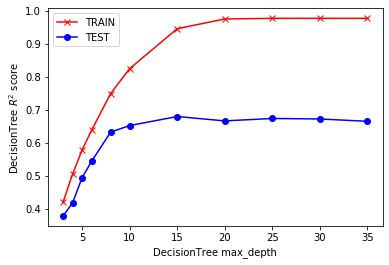

In [16]:
decision_tree()



Looking at the above plot, the best value of max_depth would be 15 to balance overfitting and accuracy.

Now we will study which feature is of most importance.


In [17]:
importance = pd.DataFrame(
    {'feature': X.columns, 'importance': tree_fit.feature_importances_}
).sort_values(by='importance', ascending=False)

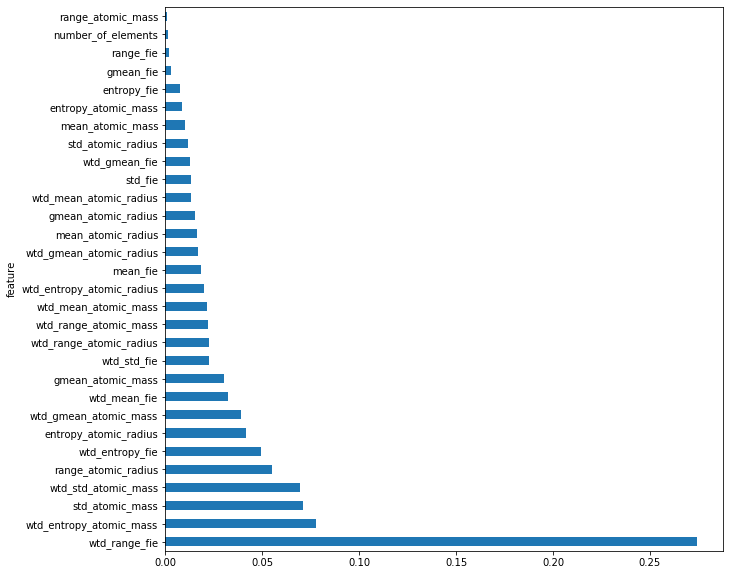

In [18]:
importance.plot('feature', 'importance', 'barh', figsize=(10, 10), legend=False);

range_fie turned out to be the most important variable. However, I did not look up what it exactly means (to be edited).Let us retrain using the 10 most important features and look at the score. 

In [19]:
best_features = importance[:10]['feature']

In [20]:
tree_fit = tree.DecisionTreeRegressor(random_state=gen).fit(X_train[best_features], Y_train)
tree_fit.score(X_train[best_features], Y_train), tree_fit.score(X_test[best_features], Y_test)

(0.9768154752041779, 0.6697174823334697)

Thus, considering the 10 most important features out of 30 still gives us the same level of accuracy. 

#### Random Forest Regression

Here we use an ensemble of decision trees that are individually less accurate but collectively more accurate, with RandomForestRegressor. The individual trees are trained on random sub-samples of the data and the resulting "forest" of predictions are averaged.

In [21]:
gen = np.random.RandomState(seed=123)
forest_fit = ensemble.RandomForestRegressor(
    n_estimators=15, max_features=0.5, random_state=gen, n_jobs=4).fit(X_train, Y_train.values.reshape(-1))

In [22]:
#Goodness of fit
forest_fit.score(X_train, Y_train), forest_fit.score(X_test, Y_test)

(0.9508750732069445, 0.7840178034429373)

Thus, using a random forest instead of a single tree leads to a 0.10 ($~15\%$) improvement in the $R^2$ value for the test set. We will perform a final hyperparameter optimization,

In [23]:
def forest_study(n=(1, 2, 3, 5, 10, 15, 20, 25, 30), seed=123):
    gen = np.random.RandomState(seed)
    train_score, test_score = [], []
    for n_estimators in n:
        fit = ensemble.RandomForestRegressor(
            n_estimators=n_estimators, max_features=0.5, random_state=gen, n_jobs=4).fit(
            X_train, Y_train.values.reshape(-1))
        train_score.append(fit.score(X_train, Y_train))
        test_score.append(fit.score(X_test, Y_test))
    plt.plot(n, train_score, 'rx-', label='TRAIN')
    plt.plot(n, test_score, 'bo-', label='TEST')
    plt.xlabel('RandomForest n_estimators')
    plt.ylabel('RandomForest $R^2$ score')
    plt.legend()

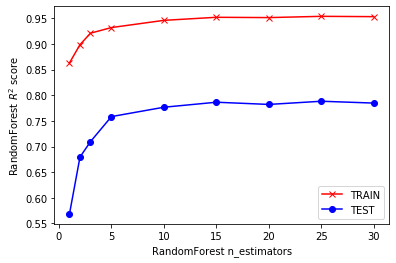

In [24]:
forest_study()

Hence the optimum value of n-estimator, which refers to the number of trees in the forest, is 25. 

Now, try changing the size of the training set, the number of features and the features themselves and see how the goodness of fit changes. How accurate k-nearest neighbor will be if we choose a very small data set? The train-test split ratio can also be changed. 